# The Multi-Layer Perceptron Exploratory Data Analysis

#### Minho Song

### 1. Load, Split, and Balance

#### 1.1 Loading

In [1]:
import pandas as pd

#Load the data
df = pd.read_csv(r'data\acs2017_census_tract_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [2]:
# Remove data with misssing instances
df.dropna(axis=0,how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Select columns with data type of object
string_columns = df.select_dtypes(include=['object']).columns

for col in string_columns:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    print(f'column {col} has {num_unique_values} number of data')
    
# Converting State data into integers
label_encode = LabelEncoder()
df['State'] = label_encode.fit_transform(df['State'])

# Remove County column
df.drop('County', axis=1, inplace=True)

df.head()


column State has 52 number of data
column County has 1954 number of data


,TractId,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


The County column has been removed from the dataset.<br>
This is because the number of unique values of county column is 1954.<br>
If converting them into numerical values can be done with one-hot encoding, there arises the dimensionality issue.<br>
Converting it with integers will introduce unintended bias to the dataset by adding ordinal feature.<br>
Even though I could make use of hashing, I decided to remove the column to make the assignment simpler.

#### 1.2 Balancing and Spliting

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64


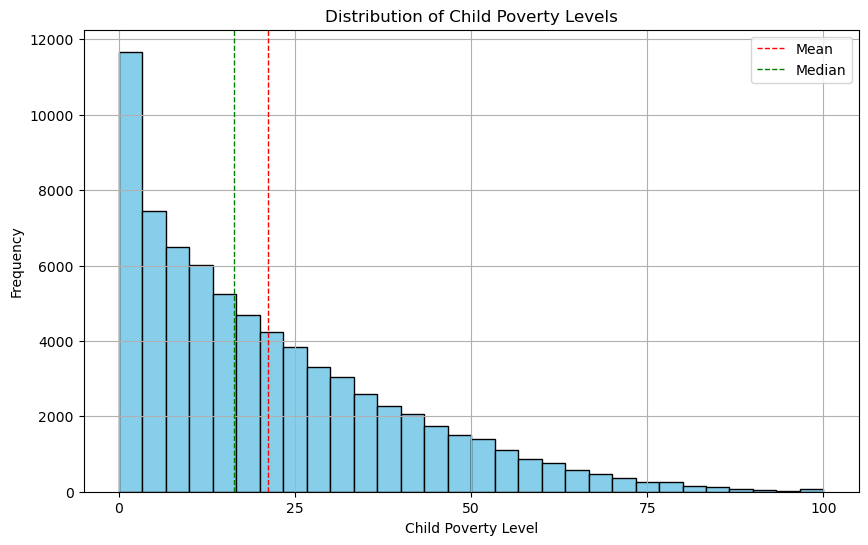

In [4]:
import matplotlib.pyplot as plt
# Check the description of ChildPorverty feature
print(df['ChildPoverty'].describe())

# Check the distribution of the data
plt.figure(figsize=(10, 6))
plt.hist(df['ChildPoverty'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df['ChildPoverty'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['ChildPoverty'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.xticks(range(0, 101, 25))
plt.xlabel('Child Poverty Level')
plt.ylabel('Frequency')
plt.title('Distribution of Child Poverty Levels')
plt.legend()
plt.grid(True)
plt.show()

In [5]:

# Split the data into 4 different classes(0 - 3)
thresholds = [0, 6.2, 16.3, 31.6, df['ChildPoverty'].max()]
df['ChildPoverty'] = pd.cut(df['ChildPoverty'], bins=thresholds, labels=False, include_lowest=True )

In [6]:
# Check the number of instances per class
count_class = df['ChildPoverty'].value_counts().sort_index()

print(count_class, '\n', count_class.sum())

ChildPoverty
0    18229
1    18171
2    18148
3    18170
Name: count, dtype: int64 
 72718


I could choose quantization thresholds to split the data<br>
However, the distribution of the data shows that the majority of the data is located in the first quarter, the value at 25% percentile being only 6.2.<br>
I assumed that a little change in thresholds should indroduce significant imbalance in the number of instances in each class due to most values clustered in the lower range.<br>
In addition, setting meaningful thresholds contradicts the goal of assigning a balanced number of data per class for the same reason.<br>
Therefore, I decided to split the data by setting thresholds in terms of percentiles in their distribution so that each class has almost the same amount of instances.


#### Q. Should balancing of the dataset be done for both the training and testing set?
No. <br>
The testing data should not be balanced.<br>
The purpose of using the test data is to introduce the model unseen data and to make it predict the results based on the training data.<br>
Therefore, the training data should be balanced to get the model well-versed<br>
However, the model will have a chance to get evaluated on its performance in real-world scenarios by making the test data remain imbalanced, mimicking reality.<br>



In [13]:


# Separate target from features
X = df.drop(columns='ChildPoverty')
y = df['ChildPoverty']

print(X.head())


      TractId  State  TotalPop   Men  Women  Hispanic  White  Black  Native  \
0  1001020100      0      1845   899    946       2.4   86.3    5.2     0.0   
1  1001020200      0      2172  1167   1005       1.1   41.6   54.5     0.0   
2  1001020300      0      3385  1533   1852       8.0   61.4   26.5     0.6   
3  1001020400      0      4267  2001   2266       9.6   80.3    7.1     0.5   
4  1001020500      0      9965  5054   4911       0.9   77.5   16.4     0.0   

   Asian  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0    1.2  ...   0.5          0.0         2.1         24.5       881   
1    1.0  ...   0.0          0.5         0.0         22.2       852   
2    0.7  ...   1.0          0.8         1.5         23.1      1482   
3    0.2  ...   1.5          2.9         2.1         25.9      1849   
4    3.1  ...   0.8          0.3         0.7         21.0      4787   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         74.2        21.2   

In [8]:

# Spliting the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 35)
(58174,)
(14544, 35)
(14544,)


### 2. Pre-processing and Initial Modeling

#### 2.1 Initial Modeling

In [20]:
from scipy.special import expit
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import sys

class TwoLayerPerceptron(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001,shuffle=True, minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,y,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((y*np.log(A3+1e-7)+(1-y)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
               
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = np.unique(y_data).shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, y_data = X_data[idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,y_data[idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  y=y_data[idx],
                                                  W1=self.W1,W2=self.W2)
                # Update weights
                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, y, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-y) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

#### 2.1.1. Performance Accuracy without one-hot coding or nomalization

In [21]:
# Define Print_result function for visualization

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

Epoch: 20/20

Glorot Initial :
Resubstitution acc: 0.25172757589301065
Validation acc: 0.246493399339934


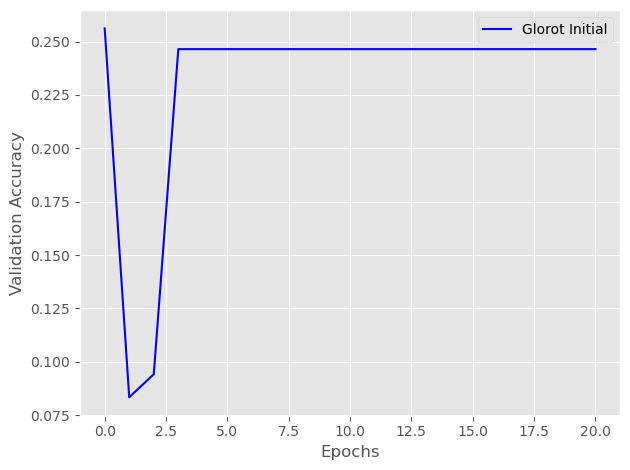

In [33]:

vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001, # poor starting learning rate!!
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_glorot_no_normalization =TwoLayerPerceptron(**vals)
nn_glorot_no_normalization.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))

print_result(nn_glorot_no_normalization,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

#### 2.1.2. Performance Accuracy without one-hot coding but with normalization

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# Normalize the data
n_components= 3
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

pipeline = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
])
preprocessor = ColumnTransformer([
    ('numeric', pipeline, numeric_features),
])
X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2)

Epoch: 20/20

Glorot init w/ normalization w/o ohc :
Resubstitution acc: 0.25054147901124213
Validation acc: 0.25123762376237624


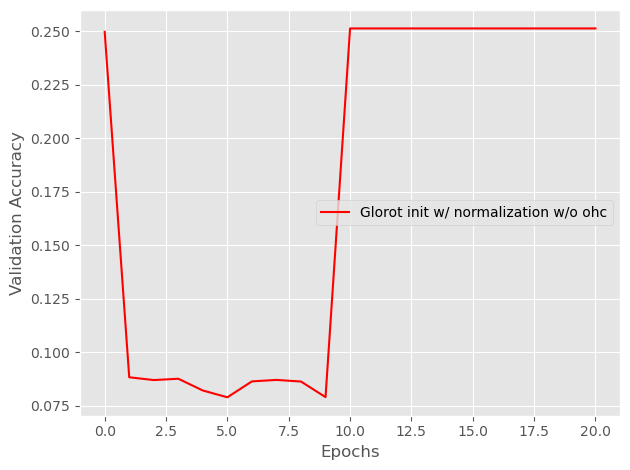

In [52]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001, # poor starting learning rate!!
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_glorot_normalization =TwoLayerPerceptron(**vals)
nn_glorot_normalization.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))


print_result(nn_glorot_normalization,X_train,y_train,X_test,y_test,title="Glorot init w/ normalization w/o ohc",color="red")
plt.show()

#### 2.1.3. Performance Accuracy with one-hot coding and normalization

In [54]:
class TwoLayerPerceptron_ohc(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, shuffle = True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):


            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)
                # Update weights
                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

Epoch: 20/20

Glorot init w/ normalization and ohc :
Resubstitution acc: 0.5607831677381648
Validation acc: 0.5523239823982399


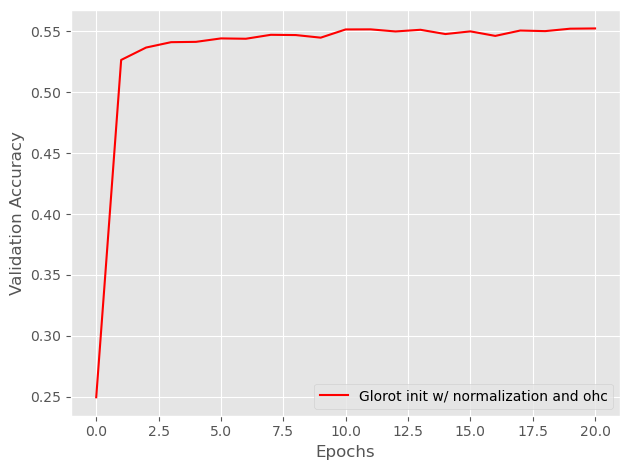

In [124]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001, # poor starting learning rate!!
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_glorot_normalization_ohc =TwoLayerPerceptron_ohc(**vals)
nn_glorot_normalization_ohc.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))


print_result(nn_glorot_normalization_ohc,X_train,y_train,X_test,y_test,title="Glorot init w/ normalization and ohc",color="red")
plt.show()

#### 2.2 Comparision

1. Normalization itself did not improve the performance of the model<br>
2. There has been a significant improvement between 2nd case and the 3rd case, which suggests that handling categorical variables with one-hot encoding is critical.<br><br>

To sum up, the model in general is not performing great in terms of accuracy.<br>
However, normalization of data and one hot encoding of target value has shown massive jump in both resubstitution and validation accuracies.<br>
This proves that these preprocessing steps contribute to improved model performance.

### 3. Modeling

#### 3.1 Adding Third Layer Support

In [68]:
class ThreeLayerPerceptron(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, shuffle = True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden
        self.n_hidden2 = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.grad_magnitudes = {'W1': [], 'W2': [], 'W3': []}
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))
 
        init_bound = 4*np.sqrt(6 / (self.n_hidden2 + self.n_hidden1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 
        
        init_bound = 4*np.sqrt(6 / (self.n_output_  + self.n_hidden2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden2))         
        

        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, b1, b2, b3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4+1e-7)+(1-Y_enc)*np.log(1-A4+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
 
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):


            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
                
                cost = self._cost(A4, Y_enc[:, idx], self.W1, self.W2, self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1, A2, A3, A4, Z1, Z2, Z3, Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2, W3=self.W3)
                # Update weights
                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2
                self.W3 -= self.eta * gradW3

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                self.b3 -= self.eta * gradb3
                # store gradient magnitude with average absolute values
                self.grad_magnitudes['W1'].append(np.mean(np.abs(gradW1)))
                self.grad_magnitudes['W2'].append(np.mean(np.abs(gradW2)))
                self.grad_magnitudes['W3'].append(np.mean(np.abs(gradW3)))
                
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
 
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4 - Y_enc)
        V2 = A3 * (1 - A3) * (self.W3.T @ V3) 
        V1 = A2 * (1 - A2) * (self.W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

Epoch: 20/20

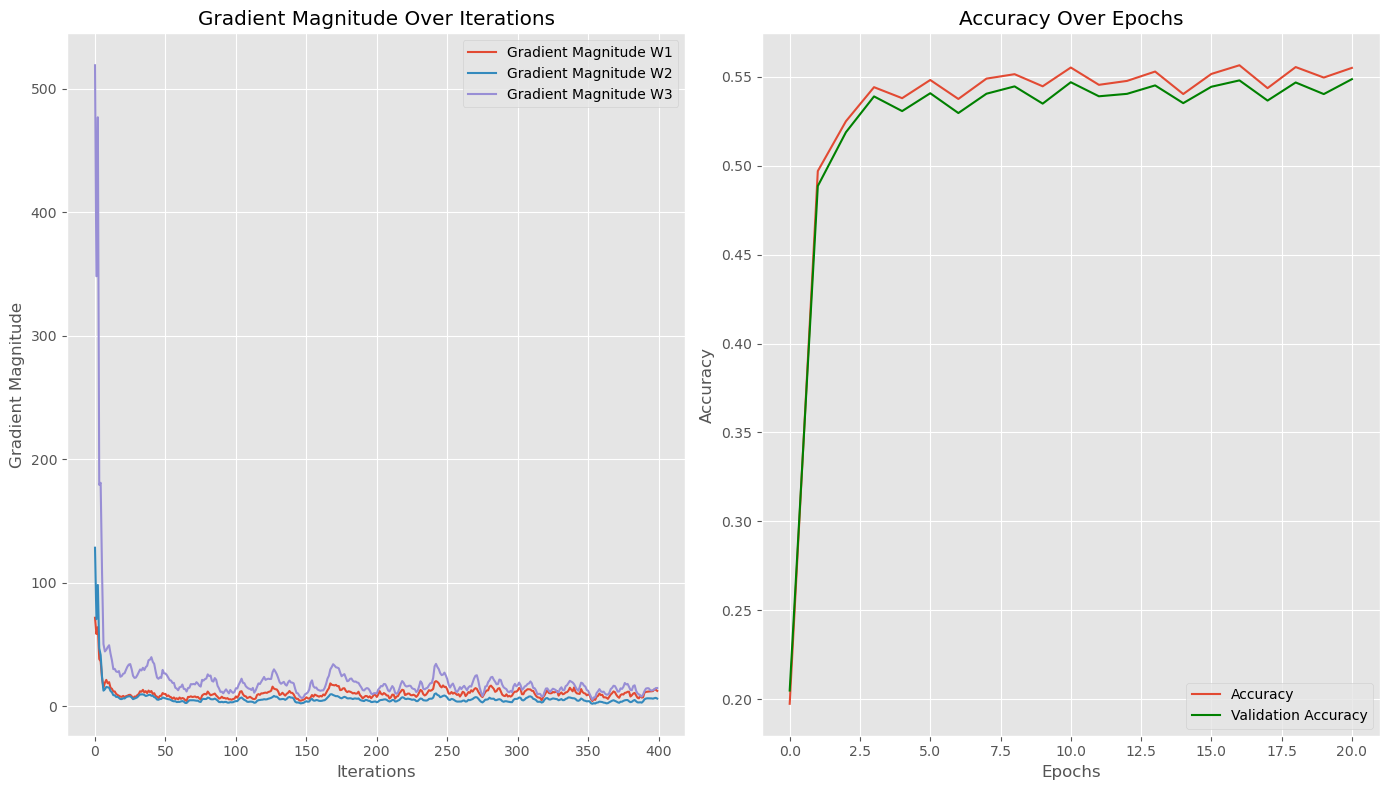

In [120]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001,
         'minibatches':20,
         'shuffle':True,'random_state':1}

three_layer =ThreeLayerPerceptron(**vals)
three_layer.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,8))

plot1.plot(three_layer.grad_magnitudes['W1'], label='Gradient Magnitude W1')
plot1.plot(three_layer.grad_magnitudes['W2'], label='Gradient Magnitude W2')
plot1.plot(three_layer.grad_magnitudes['W3'], label='Gradient Magnitude W3')
plot1.set_xlabel('Iterations')
plot1.set_ylabel('Gradient Magnitude')
plot1.set_title('Gradient Magnitude Over Iterations')
plot1.legend()

plot2.plot(three_layer.score_, label='Accuracy')
plot2.plot(three_layer.val_score_,label='Validation Accuracy', color='green')
plot2.set_xlabel('Epochs')
plot2.set_ylabel('Accuracy')
plot2.set_title('Accuracy Over Epochs')
plot2.legend()


plt.tight_layout()
plt.show()

In [122]:
print("=================")
print("Three Layer Perceptron:")
yhat = three_layer.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
yhat = three_layer.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Three Layer Perceptron:
Resubstitution acc: 0.5550245814281294
Validation acc: 0.5486798679867987


#### 3.2 Adding Fourth Layer Support

In [80]:
class FourLayerPerceptron(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, shuffle = True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden
        self.n_hidden2 = n_hidden
        self.n_hidden3 = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.grad_magnitudes = {'W1': [], 'W2': [], 'W3': [],'W4': [] }
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))
 
        init_bound = 4*np.sqrt(6 / (self.n_hidden1 + self.n_hidden2))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden2  + self.n_hidden3))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden3, self.n_hidden2))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden3  + self.n_output_))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden3))           
        

        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_output_, 1))

        
        
        return W1, W2, W3, W4, b1, b2, b3, b4
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)+ np.mean(W4[:, 1:] ** 2))
    
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5+1e-7)+(1-Y_enc)*np.log(1-A5+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):

        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):


            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
                
                cost = self._cost(A5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc[:,idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4 )
                
                # Update weights
                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2
                self.W3 -= self.eta * gradW3
                self.W4 -= self.eta * gradW4

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                self.b3 -= self.eta * gradb3
                self.b4 -= self.eta * gradb4
                
                # store gradient magnitude with average absolute values
                self.grad_magnitudes['W1'].append(np.mean(np.abs(gradW1)))
                self.grad_magnitudes['W2'].append(np.mean(np.abs(gradW2)))
                self.grad_magnitudes['W3'].append(np.mean(np.abs(gradW3)))
                self.grad_magnitudes['W4'].append(np.mean(np.abs(gradW4)))
                
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
 
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = (A5 - Y_enc)
        V3 = A4 * (1 - A4) * (self.W4.T @ V4) 
        V2 = A3 * (1 - A3) * (self.W3.T @ V3) 
        V1 = A2 * (1 - A2) * (self.W2.T @ V2)
        
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

Epoch: 20/20

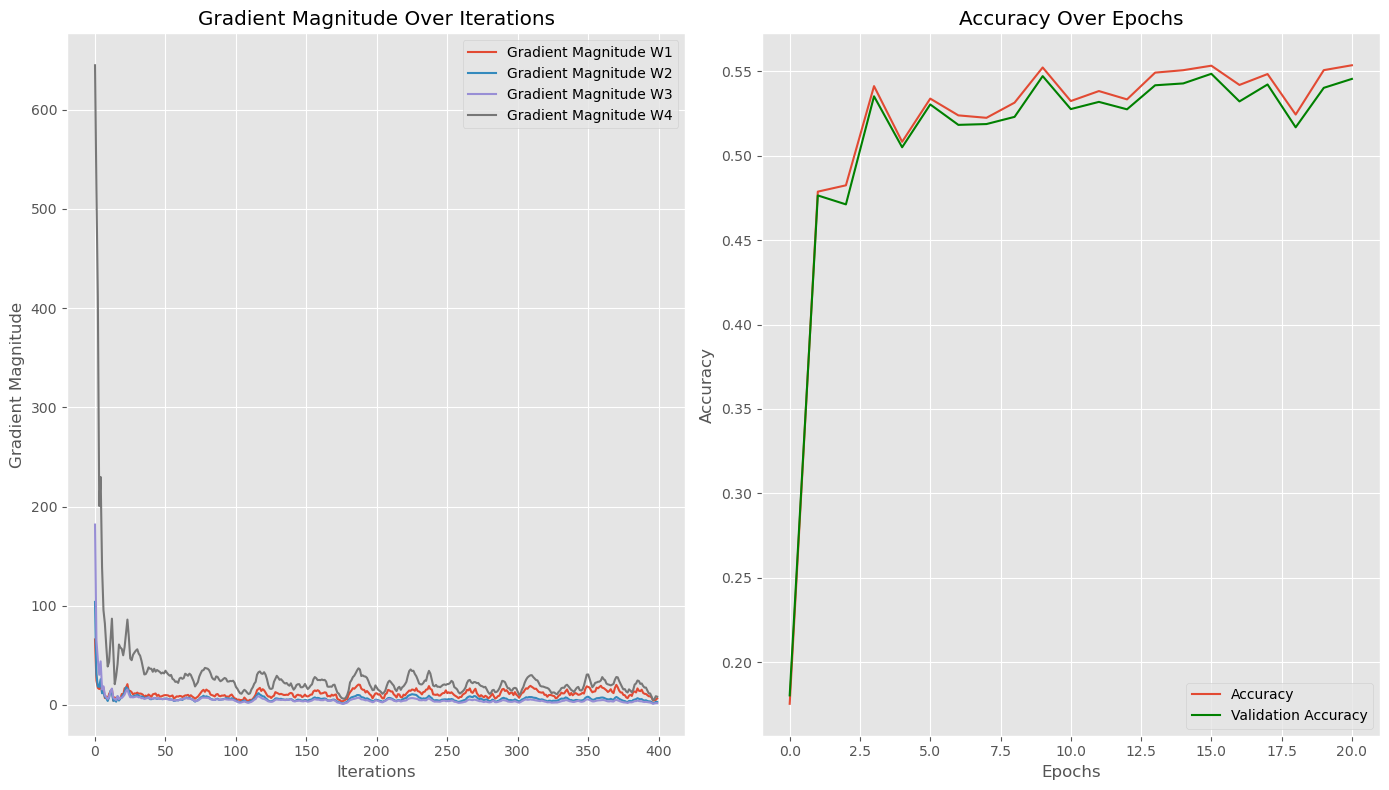

In [118]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001,
         'minibatches':20,
         'shuffle':True,'random_state':1}

four_layer =FourLayerPerceptron(**vals)
four_layer.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,8))

plot1.plot(four_layer.grad_magnitudes['W1'], label='Gradient Magnitude W1')
plot1.plot(four_layer.grad_magnitudes['W2'], label='Gradient Magnitude W2')
plot1.plot(four_layer.grad_magnitudes['W3'], label='Gradient Magnitude W3')
plot1.plot(four_layer.grad_magnitudes['W4'], label='Gradient Magnitude W4')

plot1.set_xlabel('Iterations')
plot1.set_ylabel('Gradient Magnitude')
plot1.set_title('Gradient Magnitude Over Iterations')
plot1.legend()

plot2.plot(four_layer.score_, label='Accuracy')
plot2.plot(four_layer.val_score_,label='Validation Accuracy', color='green')
plot2.set_xlabel('Epochs')
plot2.set_ylabel('Accuracy')
plot2.set_title('Accuracy Over Epochs')
plot2.legend()


plt.tight_layout()
plt.show()

In [123]:
print("=================")
print("Four Layer Perceptron:")
yhat = four_layer.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
yhat = four_layer.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Four Layer Perceptron:
Resubstitution acc: 0.5535978272080311
Validation acc: 0.5455170517051705


#### 3.3 Adding Fifth Layer Support

In [87]:
# Start from this 
class FiveLayerPerceptron(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, shuffle = True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden
        self.n_hidden2 = n_hidden
        self.n_hidden3 = n_hidden
        self.n_hidden4 = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.grad_magnitudes = {'W1': [], 'W2': [], 'W3': [],'W4': [], 'W5': [] }
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))
 
        init_bound = 4*np.sqrt(6 / (self.n_hidden1 + self.n_hidden2))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden2  + self.n_hidden3))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden3, self.n_hidden2))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden3  + self.n_hidden4))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden4, self.n_hidden3))           
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden4  + self.n_output_))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden4))

        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_hidden4, 1))
        b5 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)+ np.mean(W4[:, 1:] ** 2)+np.mean(W5[:, 1:] ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6+1e-7)+(1-Y_enc)*np.log(1-A6+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):

        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):


            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
                
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4,gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc[:,idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5 )
                
                # Update weights
                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2
                self.W3 -= self.eta * gradW3
                self.W4 -= self.eta * gradW4
                self.W5 -= self.eta * gradW5

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                self.b3 -= self.eta * gradb3
                self.b4 -= self.eta * gradb4
                self.b5 -= self.eta * gradb5
                
                # store gradient magnitude with average absolute values
                self.grad_magnitudes['W1'].append(np.mean(np.abs(gradW1)))
                self.grad_magnitudes['W2'].append(np.mean(np.abs(gradW2)))
                self.grad_magnitudes['W3'].append(np.mean(np.abs(gradW3)))
                self.grad_magnitudes['W4'].append(np.mean(np.abs(gradW4)))
                self.grad_magnitudes['W5'].append(np.mean(np.abs(gradW5)))

                
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
 
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6 - Y_enc)
        V4 = A5 * (1 - A5) * (self.W5.T @ V5)
        V3 = A4 * (1 - A4) * (self.W4.T @ V4) 
        V2 = A3 * (1 - A3) * (self.W3.T @ V3) 
        V1 = A2 * (1 - A2) * (self.W2.T @ V2)
        
        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1 ,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C
        
        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

Epoch: 20/20

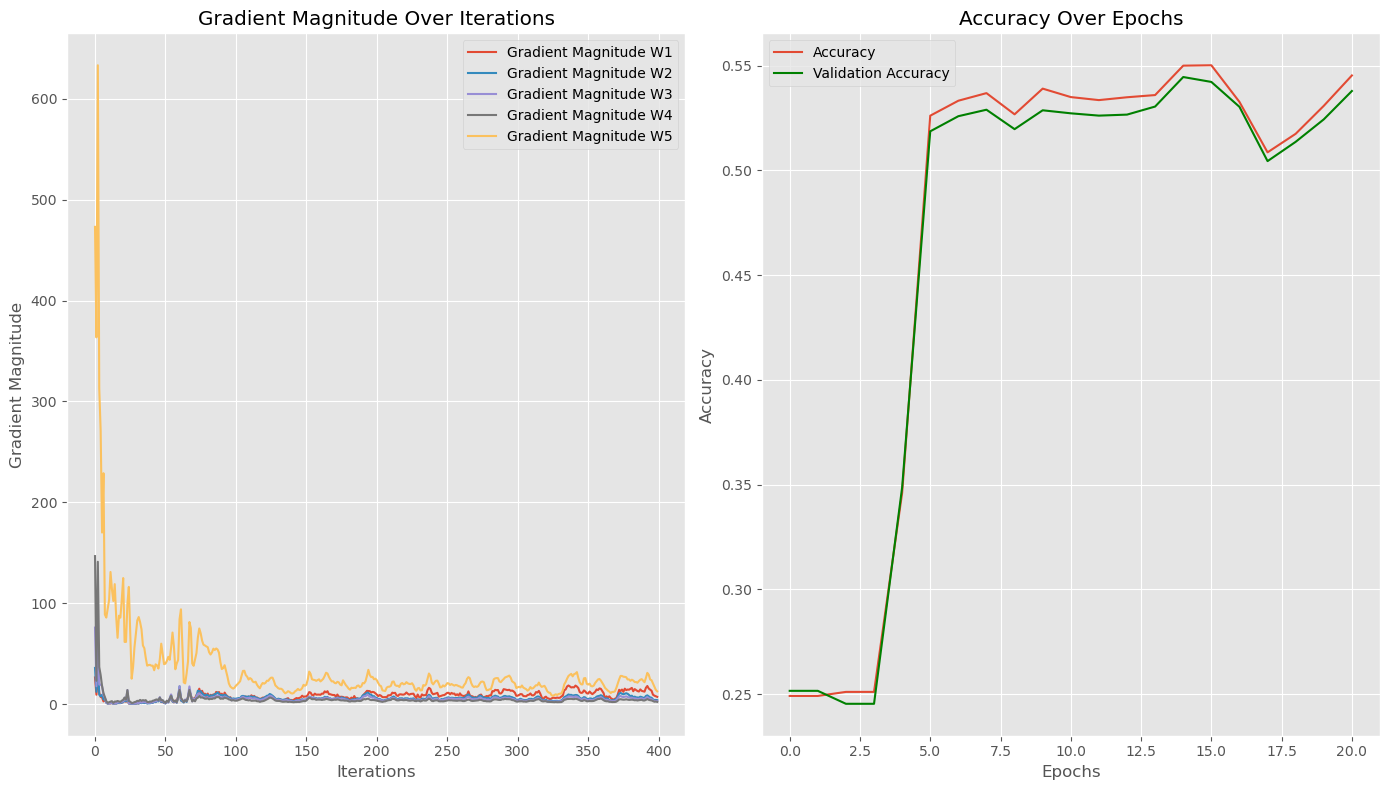

In [107]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001,
         'minibatches':20,
         'shuffle':True,'random_state':1}

five_layer =FiveLayerPerceptron(**vals)
five_layer.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,8))

plot1.plot(five_layer.grad_magnitudes['W1'], label='Gradient Magnitude W1')
plot1.plot(five_layer.grad_magnitudes['W2'], label='Gradient Magnitude W2')
plot1.plot(five_layer.grad_magnitudes['W3'], label='Gradient Magnitude W3')
plot1.plot(five_layer.grad_magnitudes['W4'], label='Gradient Magnitude W4')
plot1.plot(five_layer.grad_magnitudes['W5'], label='Gradient Magnitude W5')


plot1.set_xlabel('Iterations')
plot1.set_ylabel('Gradient Magnitude')
plot1.set_title('Gradient Magnitude Over Iterations')
plot1.legend()

plot2.plot(five_layer.score_, label='Accuracy')
plot2.plot(five_layer.val_score_,label='Validation Accuracy', color='green')
plot2.set_xlabel('Epochs')
plot2.set_ylabel('Accuracy')
plot2.set_title('Accuracy Over Epochs')
plot2.legend()


plt.tight_layout()
plt.show()

In [103]:
print("=================")
print("Five Layer Perceptron:")
yhat = five_layer.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
yhat = five_layer.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Five Layer Perceptron:
Resubstitution acc: 0.5453810980850552
Validation acc: 0.5379537953795379


#### 3.4 Adaptive Method with five layer perceptron

In [98]:
# Start from this 
class FLPRMSProp(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, shuffle = True, minibatches=1, gamma = 0.9):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden
        self.n_hidden2 = n_hidden
        self.n_hidden3 = n_hidden
        self.n_hidden4 = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.gamma = gamma
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.grad_magnitudes = {'W1': [], 'W2': [], 'W3': [],'W4': [], 'W5': [] }
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))
 
        init_bound = 4*np.sqrt(6 / (self.n_hidden1 + self.n_hidden2))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden2  + self.n_hidden3))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden3, self.n_hidden2))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden3  + self.n_hidden4))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden4, self.n_hidden3))           
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden4  + self.n_output_))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden4))

        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_hidden4, 1))
        b5 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)+ np.mean(W4[:, 1:] ** 2)+np.mean(W5[:, 1:] ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6+1e-7)+(1-Y_enc)*np.log(1-A6+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):

        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()
        
        # Initialize accumulators Vk for RMSProp
        self.V1 = np.zeros_like(self.W1)
        self.V2 = np.zeros_like(self.W2)
        self.V3 = np.zeros_like(self.W3)
        self.V4 = np.zeros_like(self.W4)
        self.V5 = np.zeros_like(self.W5) 

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):
            
            eta = self.eta

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
                
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4,gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc[:,idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5 )
                
                # Eta-grad implementation:
                G1 = gradW1*gradW1
                G2 = gradW2*gradW2
                G3 = gradW3*gradW3
                G4 = gradW4*gradW4
                G5 = gradW5*gradW5
                
                # RMSProp adjustments
                self.V1 = self.gamma * self.V1 + (1 - self.gamma) * G1
                self.V2 = self.gamma * self.V2 + (1 - self.gamma) * G2
                self.V3 = self.gamma * self.V3 + (1 - self.gamma) * G3
                self.V4 = self.gamma * self.V4 + (1 - self.gamma) * G4
                self.V5 = self.gamma * self.V5 + (1 - self.gamma) * G5

                 
                # Update weights
                self.W1 -= eta * gradW1/np.sqrt(self.V1)
                self.W2 -= eta * gradW2/np.sqrt(self.V2)
                self.W3 -= eta * gradW3/np.sqrt(self.V3)
                self.W4 -= eta * gradW4/np.sqrt(self.V4)
                self.W5 -= eta * gradW5/np.sqrt(self.V5)

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                self.b3 -= self.eta * gradb3
                self.b4 -= self.eta * gradb4
                self.b5 -= self.eta * gradb5
                
                # store gradient magnitude with average absolute values
                self.grad_magnitudes['W1'].append(np.mean(np.abs(gradW1)))
                self.grad_magnitudes['W2'].append(np.mean(np.abs(gradW2)))
                self.grad_magnitudes['W3'].append(np.mean(np.abs(gradW3)))
                self.grad_magnitudes['W4'].append(np.mean(np.abs(gradW4)))
                self.grad_magnitudes['W5'].append(np.mean(np.abs(gradW5)))

                
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
 
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6 - Y_enc)
        V4 = A5 * (1 - A5) * (self.W5.T @ V5)
        V3 = A4 * (1 - A4) * (self.W4.T @ V4) 
        V2 = A3 * (1 - A3) * (self.W3.T @ V3) 
        V1 = A2 * (1 - A2) * (self.W2.T @ V2)
        
        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1 ,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C
        
        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

Epoch: 20/20

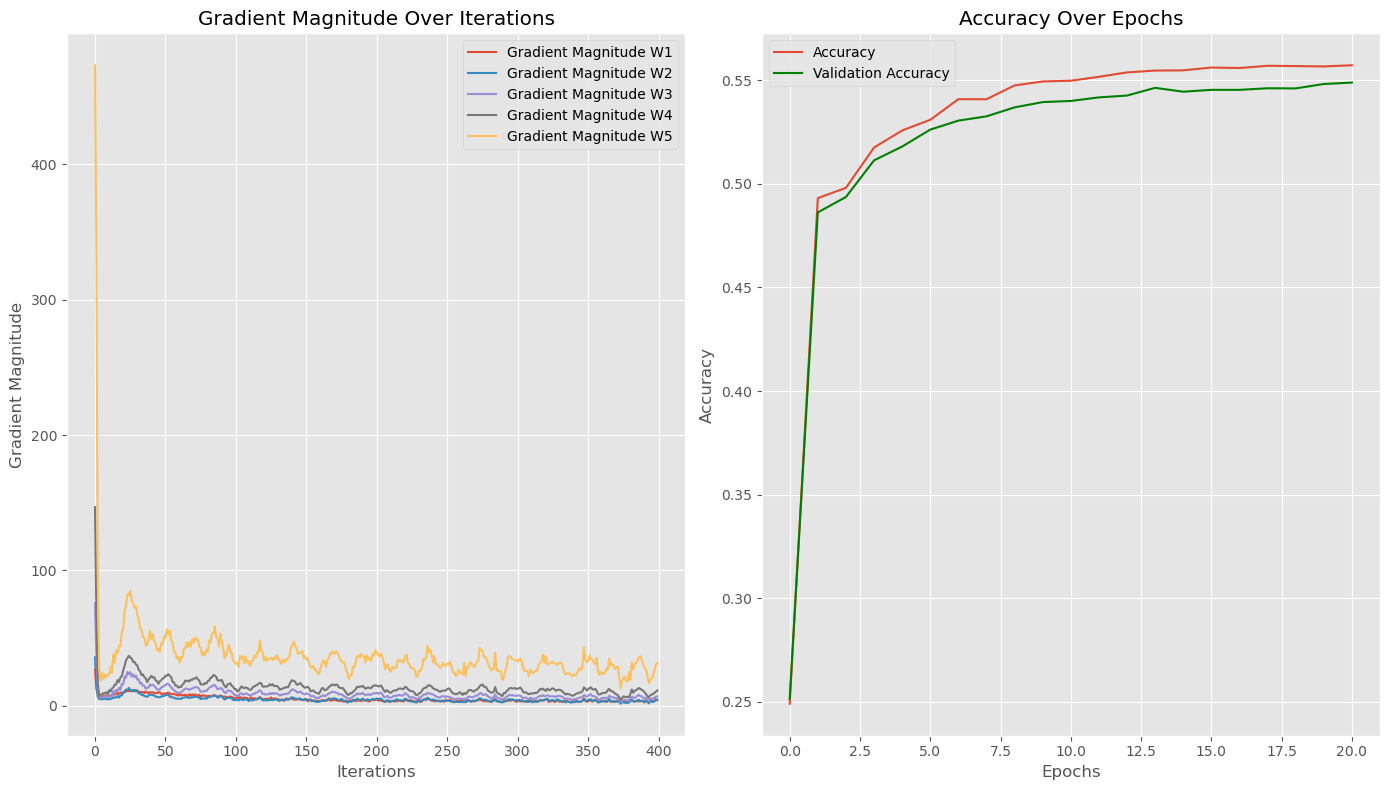

In [104]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001,
         'gamma': 0.9,
         'minibatches':20,
         'shuffle':True,'random_state':1}
flp_rmsp =FLPRMSProp(**vals)
flp_rmsp.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,8))

plot1.plot(flp_rmsp.grad_magnitudes['W1'], label='Gradient Magnitude W1')
plot1.plot(flp_rmsp.grad_magnitudes['W2'], label='Gradient Magnitude W2')
plot1.plot(flp_rmsp.grad_magnitudes['W3'], label='Gradient Magnitude W3')
plot1.plot(flp_rmsp.grad_magnitudes['W4'], label='Gradient Magnitude W4')
plot1.plot(flp_rmsp.grad_magnitudes['W5'], label='Gradient Magnitude W5')


plot1.set_xlabel('Iterations')
plot1.set_ylabel('Gradient Magnitude')
plot1.set_title('Gradient Magnitude Over Iterations')
plot1.legend()

plot2.plot(flp_rmsp.score_, label='Accuracy')
plot2.plot(flp_rmsp.val_score_,label='Validation Accuracy', color='green')
plot2.set_xlabel('Epochs')
plot2.set_ylabel('Accuracy')
plot2.set_title('Accuracy Over Epochs')
plot2.legend()


plt.tight_layout()
plt.show()

In [106]:
print("=================")
print("Five Layer Perceptron with RMSProp:")
yhat = flp_rmsp.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
yhat = flp_rmsp.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Five Layer Perceptron with RMSProp:
Resubstitution acc: 0.5571733076632173
Validation acc: 0.5488173817381738


Here, RMSProp method was used for adaptive learning technique.<br>
Both validation and resubstitution accuracy has improved slightly.<br>
=================<br>
Five Layer Perceptron:<br>
Resubstitution acc: 0.5453810980850552<br>
Validation acc: 0.5379537953795379<br>
==================================<br>
Five Layer Perceptron with RMSProp:<br>
Resubstitution acc: 0.5571733076632173<br>
Validation acc: 0.5488173817381738<br>


The graphs show that the gradient magnitude and accuracy move differently in each case.<br>
The FLP without adaptive strategy takes more iterations get to the convergence of the accuracies, and the gradient magnitudes comes down to minimal around 200 iterations. <br>
Whereas, the FLP with RMSProp boosts the accuracy after the first iteration and the accuracies converge from early epochs.<br>
The graph shows that the accuracy values do not flucutate in the FLP with RMSProp while those in the FLP without adaptive strategy fluctuate over iteration.<br>
In addition, the gradient magnitudes, espacially W5, stays high even at the end of the iteration, making the model have meaningful updates over time.


### 4. Exceptional work

In [112]:
# Start from this 
class FLPAdaM(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, shuffle = True, minibatches=1, beta1 = 0.9, beta2=0.999):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden
        self.n_hidden2 = n_hidden
        self.n_hidden3 = n_hidden
        self.n_hidden4 = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.beta1 = beta1
        self.beta2 = beta2
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.grad_magnitudes = {'W1': [], 'W2': [], 'W3': [],'W4': [], 'W5': [] }
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))
 
        init_bound = 4*np.sqrt(6 / (self.n_hidden1 + self.n_hidden2))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden2  + self.n_hidden3))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden3, self.n_hidden2))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden3  + self.n_hidden4))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden4, self.n_hidden3))           
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden4  + self.n_output_))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden4))

        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_hidden4, 1))
        b5 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)+ np.mean(W4[:, 1:] ** 2)+np.mean(W5[:, 1:] ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6+1e-7)+(1-Y_enc)*np.log(1-A6+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):

        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # Ensure X_data and y_data are numpy arrays for compatibility with numpy operations
        X_data = X_data.values if isinstance(X_data, pd.DataFrame) else X_data
        y_data = y_data.values if isinstance(y_data, pd.Series) else y_data
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()
        
        # Initialize accumulators Vk for RMSProp
        self.V1, self.M1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.V2, self.M2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.V3, self.M3 = np.zeros_like(self.W3), np.zeros_like(self.W3)
        self.V4, self.M4 = np.zeros_like(self.W4), np.zeros_like(self.W4)
        self.V5, self.M5 = np.zeros_like(self.W5), np.zeros_like(self.W5)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            
            X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
            
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):
            
            eta = self.eta

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
                
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4,gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc[:,idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5 )
                
                # Implement Eta-grad
                G1 = gradW1*gradW1
                G2 = gradW2*gradW2
                G3 = gradW3*gradW3
                G4 = gradW4*gradW4
                G5 = gradW5*gradW5
                
                # accumulated gradient
                self.M1 = self.beta1 * self.M1 + (1 - self.beta1) * gradW1
                self.M2 = self.beta1 * self.M2 + (1 - self.beta1) * gradW2
                self.M3 = self.beta1 * self.M3 + (1 - self.beta1) * gradW3
                self.M4 = self.beta1 * self.M4 + (1 - self.beta1) * gradW4
                self.M5 = self.beta1 * self.M5 + (1 - self.beta1) * gradW5
                # accumulated squared gradient
                self.V1 = self.beta2 * self.V1 + (1 - self.beta2) * G1
                self.V2 = self.beta2 * self.V2 + (1 - self.beta2) * G2
                self.V3 = self.beta2 * self.V3 + (1 - self.beta2) * G3
                self.V4 = self.beta2 * self.V4 + (1 - self.beta2) * G4
                self.V5 = self.beta2 * self.V5 + (1 - self.beta2) * G5

                # boost moments magnitudes
                M_hat1 = self.M1 / (1 - self.beta1 ** (i+1))
                M_hat2 = self.M2 / (1 - self.beta1 ** (i+1))
                M_hat3 = self.M3 / (1 - self.beta1 ** (i+1))
                M_hat4 = self.M4 / (1 - self.beta1 ** (i+1))
                M_hat5 = self.M5 / (1 - self.beta1 ** (i+1))
                
                V_hat1 = self.V1 / (1 - self.beta2 ** (i+1))
                V_hat2 = self.V2 / (1 - self.beta2 ** (i+1))
                V_hat3 = self.V3 / (1 - self.beta2 ** (i+1))
                V_hat4 = self.V4 / (1 - self.beta2 ** (i+1))
                V_hat5 = self.V5 / (1 - self.beta2 ** (i+1))
                 
                # Update weights
                self.W1 -= eta * M_hat1/np.sqrt(V_hat1)
                self.W2 -= eta * M_hat2/np.sqrt(V_hat2)
                self.W3 -= eta * M_hat3/np.sqrt(V_hat3)
                self.W4 -= eta * M_hat4/np.sqrt(V_hat4)
                self.W5 -= eta * M_hat5/np.sqrt(V_hat5)

                # Update biases
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                self.b3 -= self.eta * gradb3
                self.b4 -= self.eta * gradb4
                self.b5 -= self.eta * gradb5
                
                # store gradient magnitude with average absolute values
                self.grad_magnitudes['W1'].append(np.mean(np.abs(gradW1)))
                self.grad_magnitudes['W2'].append(np.mean(np.abs(gradW2)))
                self.grad_magnitudes['W3'].append(np.mean(np.abs(gradW3)))
                self.grad_magnitudes['W4'].append(np.mean(np.abs(gradW4)))
                self.grad_magnitudes['W5'].append(np.mean(np.abs(gradW5)))

                
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
 
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6 - Y_enc)
        V4 = A5 * (1 - A5) * (self.W5.T @ V5)
        V3 = A4 * (1 - A4) * (self.W4.T @ V4) 
        V2 = A3 * (1 - A3) * (self.W3.T @ V3) 
        V1 = A2 * (1 - A2) * (self.W2.T @ V2)
        
        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1 ,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C
        
        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

Epoch: 20/20

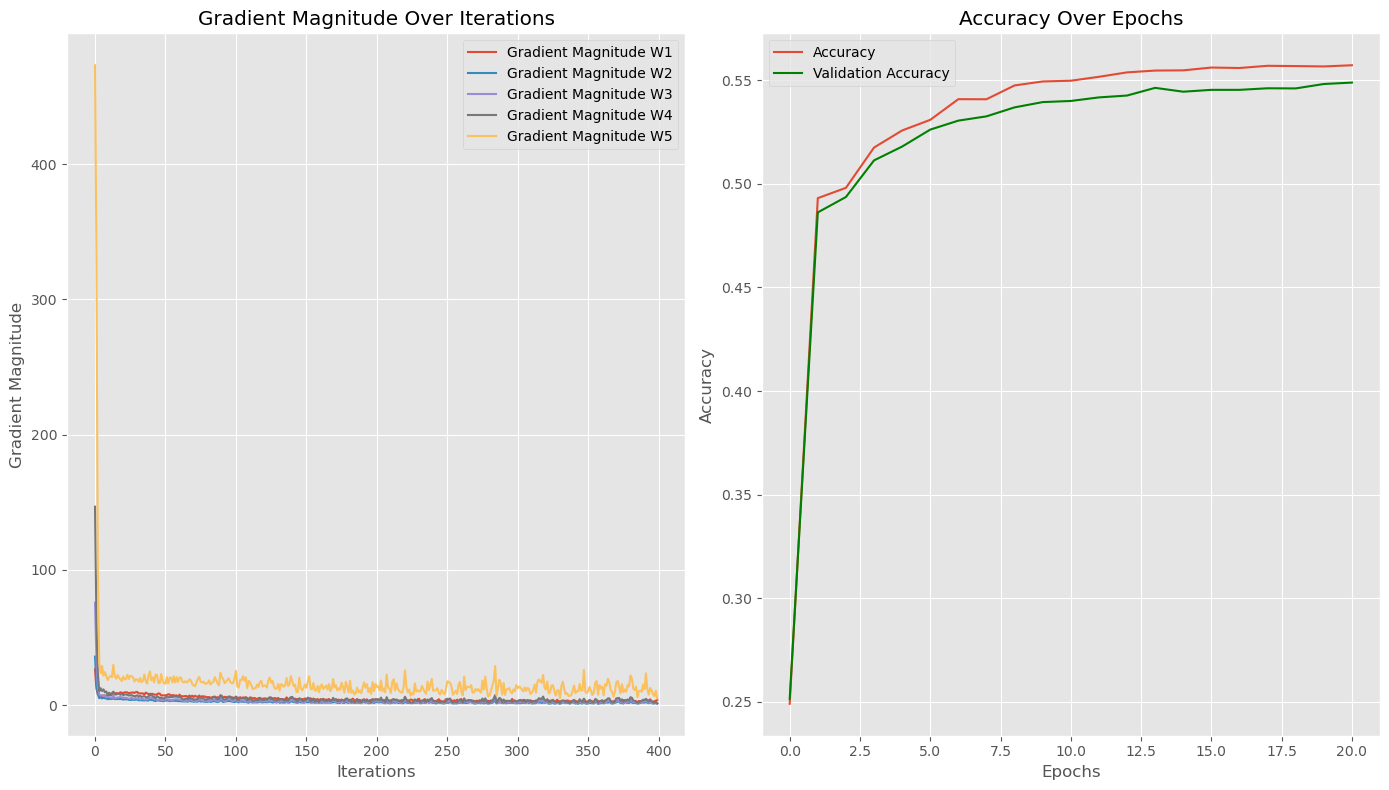

In [115]:
vals = { 'n_hidden':30, 
         'C':0.01, 'epochs':20, 'eta':0.001,
         'beta1': 0.9,
         'beta2': 0.999,
         'minibatches':20,
         'shuffle':True,'random_state':1}
flp_adam =FLPAdaM(**vals)
flp_adam.fit(X_train, y_train, print_progress=True, XY_test=(X_test, y_test))

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,8))

plot1.plot(flp_adam.grad_magnitudes['W1'], label='Gradient Magnitude W1')
plot1.plot(flp_adam.grad_magnitudes['W2'], label='Gradient Magnitude W2')
plot1.plot(flp_adam.grad_magnitudes['W3'], label='Gradient Magnitude W3')
plot1.plot(flp_adam.grad_magnitudes['W4'], label='Gradient Magnitude W4')
plot1.plot(flp_adam.grad_magnitudes['W5'], label='Gradient Magnitude W5')


plot1.set_xlabel('Iterations')
plot1.set_ylabel('Gradient Magnitude')
plot1.set_title('Gradient Magnitude Over Iterations')
plot1.legend()

plot2.plot(flp_rmsp.score_, label='Accuracy')
plot2.plot(flp_rmsp.val_score_,label='Validation Accuracy', color='green')
plot2.set_xlabel('Epochs')
plot2.set_ylabel('Accuracy')
plot2.set_title('Accuracy Over Epochs')
plot2.legend()


plt.tight_layout()
plt.show()

In [116]:
print("=================")
print("Five Layer Perceptron with RMSProp:")
yhat = flp_adam.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
yhat = flp_adam.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Five Layer Perceptron with RMSProp:
Resubstitution acc: 0.555162099907175
Validation acc: 0.5441419141914191


AdaM strategy has been implemented to the FLP model<br>
The model has not improved in terms of accuracy.<br>
Compared to the FLP with RMSProp, FLP with RMSP has a similar accuracies-over-epoch graph to FLP with AdaM. The accuracy goes high right after the first iteration and starts converging.<br>
On the other hand, the gradient magnitudes move more like FLP without adaptive strategies.<br> The gradient magnitudes become small after a few iterations and become pretty minimal after that.<br>
I have followed the convention of the class material by not applying the adaptive strategies to update b and not using an epsilon for updating weights.<br>
(AdaGrad from the class material was written without updating b and using epsilon)<br>
I hope this practice did not influence the results significantly.<br>

Based on the results from implementing various optimization strategies with different layers in the Multi-Layer Perceptron (MLP), the following conclusions can be drawn:

1. **Normalization and One-Hot Encoding:**

* Normalization alone did not significantly improve model performance.
* A substantial improvement was observed when combining normalization with one-hot encoding of categorical variables, indicating that handling categorical data appropriately is critical for enhancing model accuracy.

2. **Layer Expansion:**

* Adding more layers (three, four, and five layers) to the MLP model demonstrated that deeper networks could capture more complex patterns in the data, potentially leading to better performance. However, the gains in accuracy were not always substantial, suggesting that simply adding layers does not guarantee better results.

3. **Adaptive Learning Strategies:**

* The implementation of the `RMSProp` adaptive learning strategy resulted in a slight improvement in both training and validation accuracy compared to the standard gradient descent. The `RMSProp` strategy also stabilized the accuracy over epochs, preventing fluctuations observed in non-adaptive methods.
* The `AdaM` optimizer did not yield significant improvements over `RMSProp` in terms of accuracy. However, the `AdaM` strategy exhibited a different behavior in gradient magnitudes, indicating its potential for different types of data or model architectures.

4. **Comparison of Optimizers:**

* While both RMSProp and AdaM provided a boost in early iterations and stabilized the training process, the expected improvements in accuracy were marginal. The results suggest that while these adaptive strategies are beneficial, their impact might be more pronounced in different datasets or model configurations.
* The gradient magnitudes' behavior under different optimizers provides insights into how the model updates weights during training. RMSProp maintained higher gradient magnitudes, leading to more meaningful updates throughout the training process, whereas AdaM exhibited a more traditional diminishing gradient behavior.

5. **Final Summary:**

* Overall, the study demonstrates the importance of data preprocessing (e.g., normalization and one-hot encoding) and the potential benefits of deepening the network and employing adaptive learning strategies. However, the improvements in this specific task were modest, suggesting that further experimentation with different architectures, learning rates, or even regularization techniques might be necessary to achieve more substantial gains.<br><br>
This lab assignment provided valuable insights into the practical challenges and considerations when implementing and tuning multi-layer perceptrons for classification tasks.